# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import sys


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [33]:
cities_pd = pd.DataFrame()
cities_pd['City'] = cities
cities_pd['Lat'] = ""
cities_pd['Lng'] = ""
cities_pd['Max Temp'] = ""
cities_pd['Humidity'] = ""
cities_pd['Cloudiness'] = ""
cities_pd['Wind Speed'] = ""
cities_pd['Country'] = ""
cities_pd['Date'] = ""
cities_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,,,,,,,,
1,vaitupu,,,,,,,,
2,vaini,,,,,,,,
3,abha,,,,,,,,
4,illoqqortoormiut,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
# set up lists to hold reponse info

city = [] 
lat = []
lng = []
max_temp = []
humidity = []
cloudiness= []
wind_speed = []
country = []
date = []
count = 0

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key =  weather_api_key

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
print("----------------------------------------------------------")
print("Search started, please wait. ")
print("----------------------------------------------------------")

for city in cities:
    
    count 
    
    try:
    
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])

        print(f'City number '+ str(count)+ ' is ' + city + ' has been proccesed completed' )
        
        #sys.stdout=open("Logs/successfull cities.txt","w")
        #print(f'City number '+ str(count)+ ' is ' + city + ' has been proccesed completed' )
        #sys.stdout.close()
        
    except(KeyError, IndexError):
        
        print("City not found. Skipping...")
        #sys.stdout=open("/Logs/failed cities.txt","w")
        #print("City not found. Skipping...")
        #sys.stdout.close()
        time.sleep(4) 
    count = count + 1
        
print("----------------------------------------------------------")
print("Search completed successfully")
print("----------------------------------------------------------")

----------------------------------------------------------
Search started, please wait. 
----------------------------------------------------------
City number 0 is arraial do cabo has been proccesed completed
City not found. Skipping...
City number 2 is vaini has been proccesed completed
City number 3 is abha has been proccesed completed
City not found. Skipping...
City number 5 is port alfred has been proccesed completed
City number 6 is hilo has been proccesed completed
City number 7 is rocha has been proccesed completed
City number 8 is gamba has been proccesed completed
City number 9 is at-bashi has been proccesed completed
City number 10 is jamestown has been proccesed completed
City number 11 is victoria has been proccesed completed
City number 12 is barrow has been proccesed completed
City number 13 is tasiilaq has been proccesed completed
City number 14 is pacific grove has been proccesed completed
City number 15 is vestmannaeyjar has been proccesed completed
City number 16 is

City number 149 is ciudad bolivar has been proccesed completed
City not found. Skipping...
City number 151 is nishihara has been proccesed completed
City number 152 is praia da vitoria has been proccesed completed
City number 153 is wilmington has been proccesed completed
City number 154 is nikolskoye has been proccesed completed
City number 155 is yulara has been proccesed completed
City number 156 is sungaipenuh has been proccesed completed
City number 157 is podor has been proccesed completed
City number 158 is kaeo has been proccesed completed
City number 159 is provideniya has been proccesed completed
City number 160 is lethem has been proccesed completed
City number 161 is buchanan has been proccesed completed
City number 162 is honningsvag has been proccesed completed
City number 163 is praia has been proccesed completed
City number 164 is gobabis has been proccesed completed
City number 165 is aksarka has been proccesed completed
City number 166 is ambulu has been proccesed com

City number 297 is salinas has been proccesed completed
City number 298 is pisco has been proccesed completed
City number 299 is pierre has been proccesed completed
City number 300 is keetmanshoop has been proccesed completed
City number 301 is neiafu has been proccesed completed
City number 302 is porto novo has been proccesed completed
City number 303 is joshimath has been proccesed completed
City number 304 is inirida has been proccesed completed
City number 305 is margate has been proccesed completed
City number 306 is marsh harbour has been proccesed completed
City number 307 is carutapera has been proccesed completed
City number 308 is agadir has been proccesed completed
City number 309 is fort nelson has been proccesed completed
City number 310 is nador has been proccesed completed
City number 311 is zarubino has been proccesed completed
City number 312 is halifax has been proccesed completed
City number 313 is ulladulla has been proccesed completed
City number 314 is veinticinc

City number 449 is adrar has been proccesed completed
City number 450 is riyadh has been proccesed completed
City number 451 is goderich has been proccesed completed
City number 452 is tacuati has been proccesed completed
City number 453 is kaitangata has been proccesed completed
City number 454 is san quintin has been proccesed completed
City number 455 is koumac has been proccesed completed
City number 456 is alma has been proccesed completed
City number 457 is pitimbu has been proccesed completed
City number 458 is kapit has been proccesed completed
City number 459 is nuuk has been proccesed completed
City not found. Skipping...
City number 461 is guane has been proccesed completed
City not found. Skipping...
City number 463 is dali has been proccesed completed
City number 464 is elk has been proccesed completed
City number 465 is boma has been proccesed completed
City number 466 is chapais has been proccesed completed
City number 467 is leningradskiy has been proccesed completed
Ci

City number 600 is belaya gora has been proccesed completed
City number 601 is flinders has been proccesed completed
City number 602 is bria has been proccesed completed
City number 603 is thunder bay has been proccesed completed
City number 604 is dustlik has been proccesed completed
City number 605 is gazojak has been proccesed completed
City number 606 is buraydah has been proccesed completed
City number 607 is shu has been proccesed completed
City number 608 is grand gaube has been proccesed completed
City number 609 is ergani has been proccesed completed
City not found. Skipping...
City number 611 is yumen has been proccesed completed
City number 612 is erenhot has been proccesed completed
City number 613 is songjianghe has been proccesed completed
City number 614 is hofn has been proccesed completed
City not found. Skipping...
City not found. Skipping...
City number 617 is torbat-e jam has been proccesed completed
City number 618 is port hawkesbury has been proccesed completed
--

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [105]:
# Visualize to confirm airport data appears
cities_dict = ({"City":cities,
    "Lat": lat, 
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity" : humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country, 
    "Date": date
    })

cities_dict_df = pd.DataFrame.from_dict(cities_dict, orient='index').transpose()
cities_dict_df.head()

# Save Data to csv
cities_dict_df.to_csv("output_data/WeatherPy.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [106]:
cities_dict_df["Humidity"].max()

100

In [107]:
#  Get the indices of cities that have humidity over 100%.

hum_cities = cities_dict_df.loc[cities_dict_df['Humidity'] >= 100,:]
hum_cities.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
14,pacific grove,47.6666,-52.7314,3.33,100,90,11.83,CA,1619843240
132,ginda,-45.5752,-72.0662,8,100,75,1.03,CL,1619843338
161,buchanan,55.7435,-97.8558,0,100,90,3.6,CA,1619843194
170,vanimo,8.6226,-70.2075,24,100,100,1.54,VE,1619843361
184,haimen,-41.8697,-73.8203,13.33,100,90,8.23,CL,1619843379


In [108]:
print("No City over 100% Humidity")

No City over 100% Humidity


In [109]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_dict_df.loc[cities_dict_df["Humidity"] <= 100]
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,-22.9661,-42.0278,21.92,64,35,2.29,BR,1619843225
1,vaitupu,-21.2,-175.2,26,94,20,6.17,TO,1619843148
2,vaini,18.2164,42.5053,19,42,40,2.89,SA,1619843231
3,abha,-33.5906,26.891,14.32,81,5,5.78,ZA,1619843236
4,illoqqortoormiut,19.7297,-155.09,26,65,75,3.6,US,1619843008


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

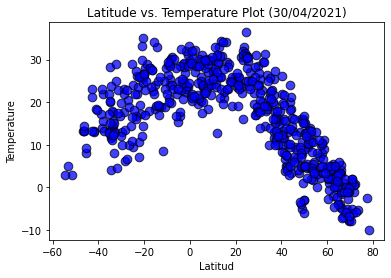

In [110]:
marker_size=15
plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'],s=75, color="blue",alpha=0.75, edgecolors = "black")
plt.title("Latitude vs. Temperature Plot (30/04/2021)")
plt.xlabel("Latitud")
plt.ylabel("Temperature")


plt.savefig("Images/Latitude vs. Temperature Plot 30042021.png", bbox_inches = "tight")
plt.show()

Notes:

The closer to 0 (ecuator) the higher the temperature.
The far away from 0 (ecuator) the lower the temperature.

## Latitude vs. Humidity Plot

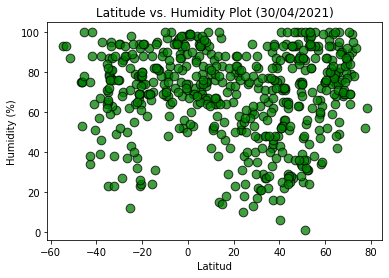

In [103]:
marker_size=15
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'],s=75, color="green",alpha=0.75, edgecolors = "black")
plt.title("Latitude vs. Humidity Plot (30/04/2021)")
plt.xlabel("Latitud")
plt.ylabel("Humidity (%)")


plt.savefig("Images/Latitude vs. Humidity Plot 30042021.png", bbox_inches = "tight")
plt.show()

Notes:

There is no clear relationship but there seems to be more concentration of higher humidity closer to 0. 
Also, we can see more points as the latitud goes higher.

## Latitude vs. Cloudiness Plot

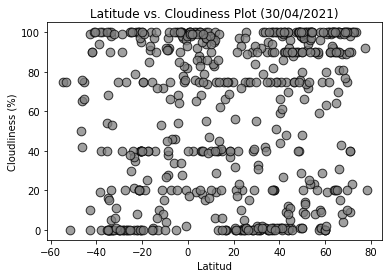

In [102]:
marker_size=15
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'],s=75, color="grey", alpha=0.75, edgecolors = "black")
plt.title("Latitude vs. Cloudiness Plot (30/04/2021)")
plt.xlabel("Latitud")
plt.ylabel("Cloudliness (%)")


plt.savefig("Images/Latitude vs. Cloudliness 30042021.png", bbox_inches = "tight")
plt.show()

Notes:

There is no clear relationship. Also, we can see more points as the latitud goes higher.

## Latitude vs. Wind Speed Plot

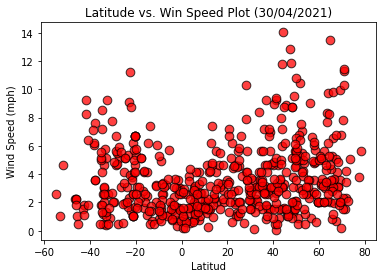

In [101]:
marker_size=15
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'],s=75, color="red", alpha=0.75, edgecolors = "black")
plt.title("Latitude vs. Win Speed Plot (30/04/2021)")
plt.xlabel("Latitud")
plt.ylabel("Wind Speed (mph)")


plt.savefig("Images/Latitude vs. Wind Speed Plot 30042021.png", bbox_inches = "tight")
plt.show()

Notes:

There is no clear relationship. We can see more points as the wind speed goes lower.

## Linear Regression

In [78]:
clean_city_data["Lat"] = cities_dict_df["Lat"].astype(float)
clean_city_data["Lng"] = cities_dict_df["Lng"].astype(float)
clean_city_data["Max Temp"] = cities_dict_df["Max Temp"].astype(float)
clean_city_data["Humidity"] = cities_dict_df["Humidity"].astype(float)
clean_city_data["Cloudiness"] = cities_dict_df["Cloudiness"].astype(float)
clean_city_data["Wind Speed"] = cities_dict_df["Wind Speed"].astype(float)

clean_city_data.dtypes

<ipython-input-78-75249bf0cfff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_city_data["Lat"] = cities_dict_df["Lat"].astype(float)
<ipython-input-78-75249bf0cfff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_city_data["Lng"] = cities_dict_df["Lng"].astype(float)
<ipython-input-78-75249bf0cfff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date           object
dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [95]:
northern_df = clean_city_data.loc[clean_city_data['Lat'] > 0,:]
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,vaini,18.2164,42.5053,19.00,42.0,40.0,2.89,SA,1619843231
4,illoqqortoormiut,19.7297,-155.0900,26.00,65.0,75.0,3.60,US,1619843008
7,rocha,41.1702,75.8106,11.54,71.0,98.0,0.06,KG,1619843238
8,gamba,42.0970,-79.2353,5.00,56.0,90.0,4.63,US,1619842917
9,at-bashi,22.2855,114.1577,30.56,58.0,97.0,4.47,HK,1619843033


In [96]:
northern_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date           object
dtype: object

The correlation between Latitude and Max Temp is -0.87
The r-squared is: 0.7625904251378767


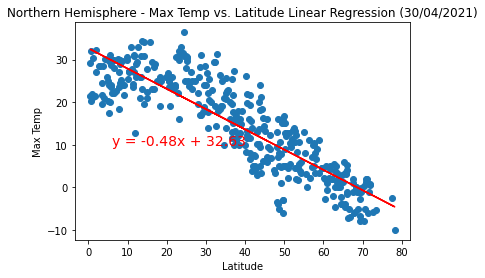

In [97]:
correlation=round(st.pearsonr(northern_df["Lat"], northern_df["Max Temp"])[0],2)
print(f"The correlation between Latitude and Max Temp is {correlation}")

x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (30/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression 30042021.png", bbox_inches = "tight")
plt.show()

Notes:

The closer to 0 (equator) the higher the temperature. The far away from 0 (ecuator) the lower the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [98]:
southern_df = clean_city_data.loc[clean_city_data['Lat'] < 0,:]
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,-22.9661,-42.0278,21.92,64.0,35.0,2.29,BR,1619843225
1,vaitupu,-21.2000,-175.2000,26.00,94.0,20.0,6.17,TO,1619843148
3,abha,-33.5906,26.8910,14.32,81.0,5.0,5.78,ZA,1619843236
5,port alfred,-34.4833,-54.3333,11.93,79.0,100.0,2.62,UY,1619843237
6,hilo,-2.6500,10.0000,24.90,92.0,100.0,1.68,GA,1619843237


The correlation between Latitude and Max Temp is 0.61
The r-squared is: 0.3761936170913906


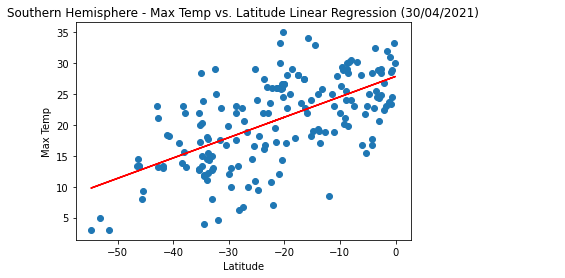

In [99]:
correlation=round(st.pearsonr(southern_df["Lat"], southern_df["Max Temp"])[0],2)
print(f"The correlation between Latitude and Max Temp is {correlation}")

x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (30/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression 30042021.png", bbox_inches = "tight")
plt.show()

Notes: 

The closer to 0 (equator) the higher the temperature. The far away from 0 (ecuator) the lower the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Latitude and Humidity(%) is 0.06
The r-squared is: 0.003972235801732684


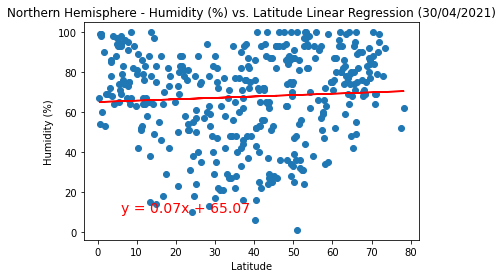

In [100]:
correlation=round(st.pearsonr(northern_df["Lat"], northern_df["Humidity"])[0],2)
print(f"The correlation between Latitude and Humidity(%) is {correlation}")

x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (30/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression 30042021.png", bbox_inches = "tight")
plt.show()

Notes:
    
Not a strong relationship. Humidity decrease as latitud approach to 0 (equator)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Latitude and Humidity(%) is 0.15
The r-squared is: 0.022407957476066644


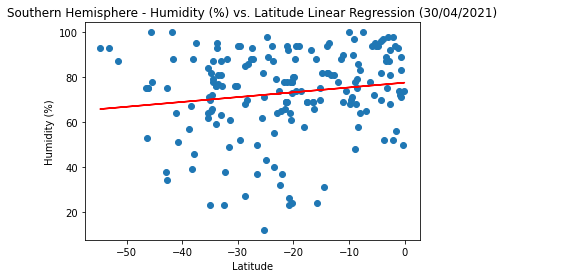

In [90]:
correlation=round(st.pearsonr(southern_df["Lat"], southern_df["Humidity"])[0],2)
print(f"The correlation between Latitude and Humidity(%) is {correlation}")

x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (30/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression 30042021.png", bbox_inches = "tight")
plt.show()

Notes:
    
A small humidity increase as latitud approach to 0 (equator)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Latitude and Cloudiness(%) is 0.1
The r-squared is: 0.009654824625020882


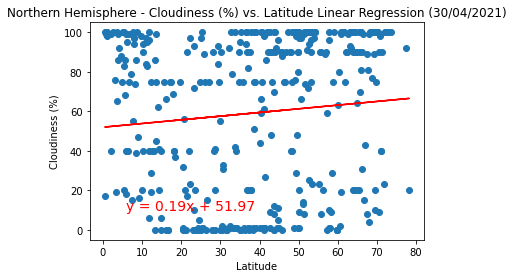

In [89]:
correlation=round(st.pearsonr(northern_df["Lat"], northern_df["Cloudiness"])[0],2)
print(f"The correlation between Latitude and Cloudiness(%) is {correlation}")

x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (30/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 30042021.png", bbox_inches = "tight")
plt.show()

Notes:
    
There is no clear relationship.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Latitude and Cloudiness(%) is 0.17
The r-squared is: 0.02951159701614213


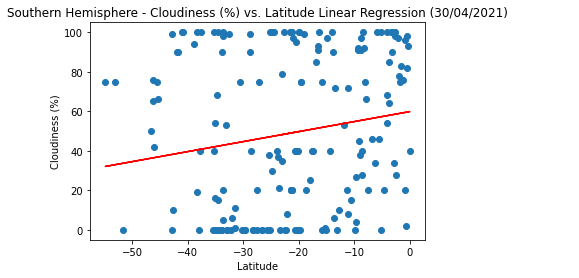

In [87]:
correlation=round(st.pearsonr(southern_df["Lat"], southern_df["Cloudiness"])[0],2)
print(f"The correlation between Latitude and Cloudiness(%) is {correlation}")

x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (30/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 30042021.png", bbox_inches = "tight")
plt.show()

Notes:
    
There is no clear relationship.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Latitude and Wind Speed(mph) is 0.12
The r-squared is: 0.013594432049973581


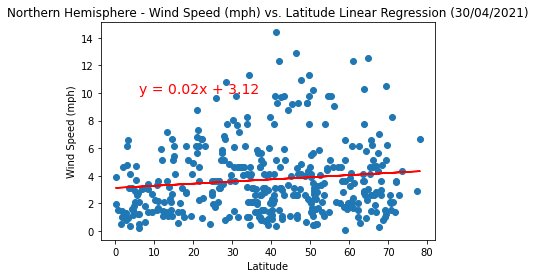

In [26]:
correlation=round(st.pearsonr(northern_df["Lat"], northern_df["Wind Speed"])[0],2)
print(f"The correlation between Latitude and Wind Speed(mph) is {correlation}")

x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (30/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression 30042021.png", bbox_inches = "tight")
plt.show()

Notes: 

There is no clear relationship. We can see more points as the wind speed goes lower.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Latitude and Wind Speed(mph) is -0.21
The r-squared is: 0.0447703825228501


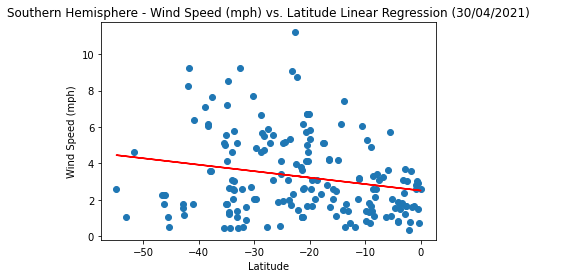

In [86]:
correlation=round(st.pearsonr(southern_df["Lat"], southern_df["Wind Speed"])[0],2)
print(f"The correlation between Latitude and Wind Speed(mph) is {correlation}")

x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (30/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression 30042021.png", bbox_inches = "tight")
plt.show()

Notes: 

There is no clear relationship. We can see more points as the wind speed goes lower.

# Final Analysis
----

## Notes:
* Dataframe created with relevant information for cities generated randomly such as Latitude, Longitude, Max Temperature, Humidity, Cloudiness, Wind Speed, Country, Date.


* API calls to openweathermap.org to fullfill the lists created for items mentioned before.


* New DataFrame equal to the city data to drop all humidity higher than 100 was created.


* Latitude vs. Temperature Plot.

   The closer to 0 (equator) the higher the temperature.
   
   The far away from 0 (equator) the lower the temperature.


* Latitude vs. Temperature Plot.

   There is no clear relationship but there seems to be more concentration of higher humidity closer to 0. 
   
   Also, we can see more points as the latitud goes higher.
   
   
* Latitud vs. Wind Speed Plot

    There is no clear relationship. We can see more points as the wind speed goes lower.
    
    
* Northern Hemisphere - Max Temp vs. Latitude Linear Regression

    The closer to 0 (equator) the higher the temperature. The far away from 0 (ecuator) the lower the temperature.
    
    
* Southern Hemisphere - Max Temp vs. Latitude Linear Regression

    The closer to 0 (equator) the higher the temperature. The far away from 0 (ecuator) the lower the temperature.


* Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
    
    A small humidity decrease as latitud approach to 0 (equator).
    

* Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

    A small humidity increase as latitud approach to 0 (equator).
    
    
* Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

    There is no clear relationship.
    
    
* Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

    There is no clear relationship.
    
    
* Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

    There is no clear relationship. We can see more points as the wind speed goes lower.   
    
    
* Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

    There is no clear relationship. We can see more points as the wind speed goes lower.   